In [1]:
import pandas as pd
data = pd.DataFrame({'group': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
                    'data': [4, 3, 2, 1, 12, 3, 4, 5, 7]})
data

,group,data
0,a,4
1,a,3
2,a,2
3,b,1
4,b,12
5,b,3
6,c,4
7,c,5
8,c,7


In [3]:
data.sort_values(by=['group', 'data'], ascending=[False, True], inplace=True)
data

,group,data
6,c,4
7,c,5
8,c,7
3,b,1
5,b,3
4,b,12
2,a,2
1,a,3
0,a,4


In [4]:
data = pd.DataFrame({'k1':['one']*3+['two']*4,
                    'k2': [3,2,1,3,3,4,4]})
data

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
4,two,3
5,two,4
6,two,4


In [5]:
data.sort_values(by='k2')

,k1,k2
2,one,1
1,one,2
0,one,3
3,two,3
4,two,3
5,two,4
6,two,4


In [6]:
data.drop_duplicates()

,k1,k2
0,one,3
1,one,2
2,one,1
3,two,3
5,two,4


In [7]:
data.drop_duplicates(subset='k1')

,k1,k2
0,one,3
3,two,3


In [8]:
data = pd.DataFrame({'food':['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2'],
             'data': [1,2,3,4,5,6,7]})
data

,food,data
0,A1,1
1,A2,2
2,B1,3
3,B2,4
4,B3,5
5,C1,6
6,C2,7


In [9]:
def food_map(series):
    if series['food'] == 'A1':
        return 'A'
    elif series['food'] == 'A2':
        return 'A'
    elif series['food'] == 'B1':
        return 'B'
    elif series['food'] == 'B2':
        return 'B'
    elif series['food'] == 'B3':
        return 'B'
    elif series['food'] == 'C1':
        return 'C'
    elif series['food'] == 'C2':
        return 'C'
    
data['food_map'] = data.apply(food_map, axis='columns')
data

,food,data,food_map
0,A1,1,A
1,A2,2,A
2,B1,3,B
3,B2,4,B
4,B3,5,B
5,C1,6,C
6,C2,7,C


In [10]:
food2Upper = {
    'A1' : 'A',
    'A2' : 'A',
    'B1' : 'B',
    'B2' : 'B',
    'B3' : 'B',
    'C1' : 'C',
    'C2' : 'C',
}
data['UPPER'] = data['food'].map(food2Upper)
data

,food,data,food_map,UPPER
0,A1,1,A,A
1,A2,2,A,A
2,B1,3,B,B
3,B2,4,B,B
4,B3,5,B,B
5,C1,6,C,C
6,C2,7,C,C


In [23]:
import numpy as np
df = pd.DataFrame({'data1': np.random.randn(5),
                  'data2': np.random.randn(5)})
df2 = df.assign(ratio = df['data1']/df['data2'])
df2

,data1,data2,ratio
0,0.777620,2.485116,0.312911
1,0.324523,-1.186574,-0.273496
2,-0.207708,-1.214922,0.170964
3,-0.324658,-0.245650,1.321630
4,1.041690,-1.710743,-0.608911


In [24]:
df2.drop('ratio', axis='columns', inplace=True)
df2

,data1,data2
0,0.777620,2.485116
1,0.324523,-1.186574
2,-0.207708,-1.214922
3,-0.324658,-0.245650
4,1.041690,-1.710743


In [25]:
data = pd.Series([1,2,3,4,5,6,7,8,9])
data

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64

In [26]:
data.replace(9, np.nan, inplace=True)
data

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
7    8.0
8    NaN
dtype: float64

In [28]:
ages = [15, 18, 20, 21, 22, 34, 41, 52, 63, 79]
bins = [10, 40, 80]
bins_res = pd.cut(ages, bins)
bins_res

[(10, 40], (10, 40], (10, 40], (10, 40], (10, 40], (10, 40], (40, 80], (40, 80], (40, 80], (40, 80]]
Categories (2, interval[int64]): [(10, 40] < (40, 80]]

In [38]:
bins_res.codes

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int8)

In [39]:
pd.value_counts(bins_res)

(10, 40]    6
(40, 80]    4
dtype: int64

In [40]:
pd.cut(ages, [10, 20, 50, 80])

[(10, 20], (10, 20], (10, 20], (20, 50], (20, 50], (20, 50], (20, 50], (50, 80], (50, 80], (50, 80]]
Categories (3, interval[int64]): [(10, 20] < (20, 50] < (50, 80]]

In [42]:
group_names = ['Youth', 'Middle', 'Old']
#pd.cut(ages, [10, 20, 50, 80], labels=group_names)
pd.value_counts(pd.cut(ages, [10, 20, 50, 80], labels=group_names))

Middle    4
Old       3
Youth     3
dtype: int64

In [43]:
df = pd.DataFrame([range(3), [0, np.nan, 0], [0, 0, np.nan], range(3)])
df

,0,1,2
0,0,1.0,2.0
1,0,NaN,0.0
2,0,0.0,NaN
3,0,1.0,2.0


In [44]:
df.isnull()

,0,1,2
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False


In [45]:
df.isnull().any()

0    False
1     True
2     True
dtype: bool

In [47]:
df.isnull().any(axis=1)

0    False
1     True
2     True
3    False
dtype: bool

In [49]:
df.fillna(5)

,0,1,2
0,0,1.0,2.0
1,0,5.0,0.0
2,0,0.0,5.0
3,0,1.0,2.0


In [50]:
df[df.isnull().any(axis=1)]

,0,1,2
1,0,NaN,0.0
2,0,0.0,NaN


In [51]:
s = pd.Series(['A', 'b', 'B', 'gear', 'AEGER', np.nan])

In [52]:
s

0        A
1        b
2        B
3     gear
4    AEGER
5      NaN
dtype: object

In [53]:
s.str.lower()

0        a
1        b
2        b
3     gear
4    aeger
5      NaN
dtype: object

In [54]:
s.str.upper()

0        A
1        B
2        B
3     GEAR
4    AEGER
5      NaN
dtype: object

In [55]:
s.str.len()

0    1.0
1    1.0
2    1.0
3    4.0
4    5.0
5    NaN
dtype: float64

In [56]:
index = pd.Index(['   tang', '   yu   ', 'di'])
index

Index(['   tang', '   yu   ', 'di'], dtype='object')

In [57]:
index.str.strip()

Index(['tang', 'yu', 'di'], dtype='object')

In [60]:
df = pd.DataFrame(np.random.randn(3,2), columns=['A a', 'B b'],index=range(3))

In [61]:
df

,A a,B b
0,0.597792,0.133962
1,-0.858144,-0.041382
2,1.398019,-0.735142


In [62]:
df.columns = df.columns.str.replace(' ', '_')

In [63]:
df

,A_a,B_b
0,0.597792,0.133962
1,-0.858144,-0.041382
2,1.398019,-0.735142


In [83]:
s = pd.Series(['a_b_C', 'c_d_E', 'f_G_H'])
s

0    a_b_C
1    c_d_E
2    f_G_H
dtype: object

In [84]:
s.str.split('_')

0    [a, b, C]
1    [c, d, E]
2    [f, G, H]
dtype: object

In [85]:
s.str.split('_', expand=True, n=1)

,0,1
0,a,b_C
1,c,d_E
2,f,G_H


In [86]:
s = pd.Series(['A', 'B', 'dfd', 'gdaf', 'da'])
s

0       A
1       B
2     dfd
3    gdaf
4      da
dtype: object

In [90]:
s.str.contains('df')

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [91]:
s = pd.Series(['a', 'a|b', 'a|c'])
s

0      a
1    a|b
2    a|c
dtype: object

In [92]:
s.str.get_dummies(sep='|')

,a,b,c
0,1,0,0
1,1,1,0
2,1,0,1


In [93]:
%matplotlib inline

<AxesSubplot:>

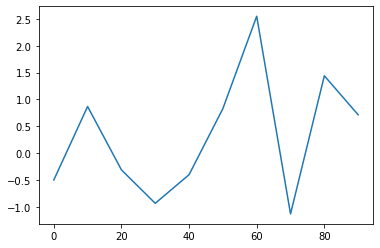

In [94]:
s = pd.Series(np.random.randn(10), index=np.arange(0,100,10))
s.plot()

In [95]:
 df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  index = np.arange(0, 100, 10),
                  columns = ['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,-0.668431,0.902263,-0.481483,-0.005891
10,-1.656025,0.744809,-1.258315,-0.815973
20,-1.919257,1.965121,-2.135349,-1.217974
30,-2.424169,1.058107,-1.162163,-0.844086
40,-3.410259,1.249629,-1.219218,-2.009678


<AxesSubplot:>

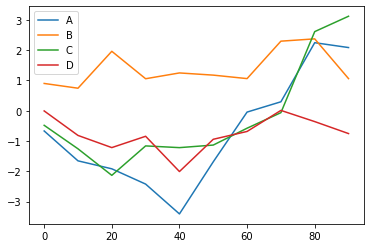

In [96]:
df.plot()

<AxesSubplot:>

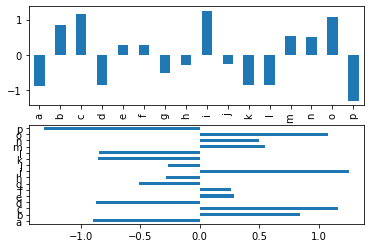

In [100]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot(ax = axes[0], kind='bar')
data.plot(ax = axes[1], kind='barh')

In [104]:
df = pd.DataFrame(np.random.rand(6,4),
              index = ['one', 'two', 'three', 'four', 'five', 'six'],
              columns = pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.head()

Genus,A,B,C,D
one,0.026339,0.035705,0.365633,0.244660
two,0.253047,0.449327,0.500227,0.094101
three,0.793006,0.250662,0.290544,0.294829
four,0.122909,0.908009,0.454903,0.392811
five,0.540084,0.381153,0.601457,0.114741


<AxesSubplot:>

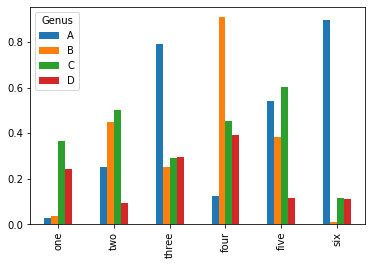

In [106]:
df.plot(kind='bar')

In [107]:
df = pd.read_csv(r'D:\01_Arbeit\02_Studierung\13 数字化学习\01 网课\01 学习笔记\02 Python基础\01 py_file\data\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
data = df[['Fare', 'Pclass', 'Survived']]

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

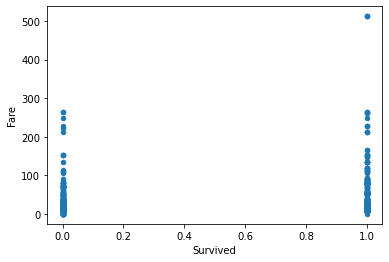

In [111]:
data.plot.scatter('Survived', 'Fare')